In [13]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import seaborn as sns
import matplotlib.pyplot as plt
import networkx
import pathpy as pp

In [4]:
coord = pd.read_csv('/Users/wastechs/Documents/git-repos/wake_effect/data/Pos_WTG_Brasil.csv')

In [5]:
coord.head()

,WTG,Alt.,Lat.,Long.
0,TOR,41.5,-4.190,-38.080
1,W01,33.9,-4.185,-38.084
2,W02,32.5,-4.183,-38.086
3,W03,42.6,-4.183,-38.088
4,W04,42.1,-4.184,-38.087


In [6]:
lat = coord['Lat.'].values
long = coord['Long.'].values

coords = []

for lat, long in zip(lat, long):
    coords.append((lat, long))

euclid_distances = pd.DataFrame(
    distance.cdist(coords, coords, 'euclidean'), 
    columns=coord['WTG'],
    index = coord['WTG'])

subset_proximity = euclid_distances[(euclid_distances <= 0.004) & (euclid_distances > 0.0)]
subset_proximity.fillna(value=0, inplace=True)
subset_proximity[subset_proximity > 0] = 1

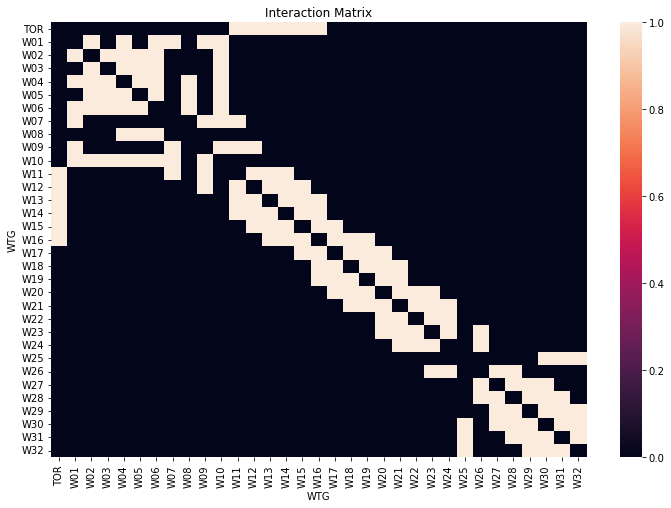

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(subset_proximity)
plt.title('Interaction Matrix')
plt.show()

## Building the Network

if 1 then .add_edge between the two nodes (turbines) else nothing

_Notes_:

Should use a triangular matrix due to commutative property. Then, could use a weighting to represent density (how many other turbines a turbine has a connection to)

In [168]:
turb_graph = pp.Network(directed=False)

In [169]:
cnt = 0

for row in range(0, 33):
    for turb1 in subset_proximity.iloc[[row]].index:
        for int, adj_turb in zip(subset_proximity.values[row], subset_proximity.columns):
            cnt += 1
            if int == 1:
                turb_graph.add_edge(turb1, adj_turb)
                #print(turb1, '&', adj_turb)
            else:
                pass

print(cnt)


1089


In [170]:
turb_graph

In [147]:
print(turb_graph)

Undirected network
Nodes:				33
Links:				88



In [150]:
pp.algorithms.centralities.betweenness(turb_graph)

2022-01-05 17:54:06 [Severity.INFO]	Calculating betweenness centralities ...


defaultdict(<function pathpy.algorithms.centralities.betweenness.<locals>.<lambda>()>,
            {'W11': 123.16873394071143,
             'W07': 45.5411857707512,
             'W09': 325.0670559874895,
             'W12': 301.2295945728805,
             'W01': 94.99999999999969,
             'W10': 206.0000000000015,
             'W04': 23.999999999999854,
             'W05': 11.99999999999995,
             'W06': 23.999999999999854,
             'W15': 285.7748041714642,
             'W16': 207.97988304736265,
             'W17': 295.7674834457959,
             'W19': 79.86741141032455,
             'W18': 79.86741141032455,
             'W20': 325.21229111804195,
             'W21': 119.10098322729935,
             'W23': 319.48108733372055,
             'W24': 50.770402930403186,
             'W26': 350.00000000000307,
             'W27': 90.13333333333364,
             'W30': 61.466666666666974,
             'W28': 170.53333333333478,
             'W31': 30.066666666666666,
     